<a href="https://colab.research.google.com/github/armanjoy09/Image-Processing-Lab/blob/main/Data_Augmentation_Ex_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 838 images belonging to 4 classes.


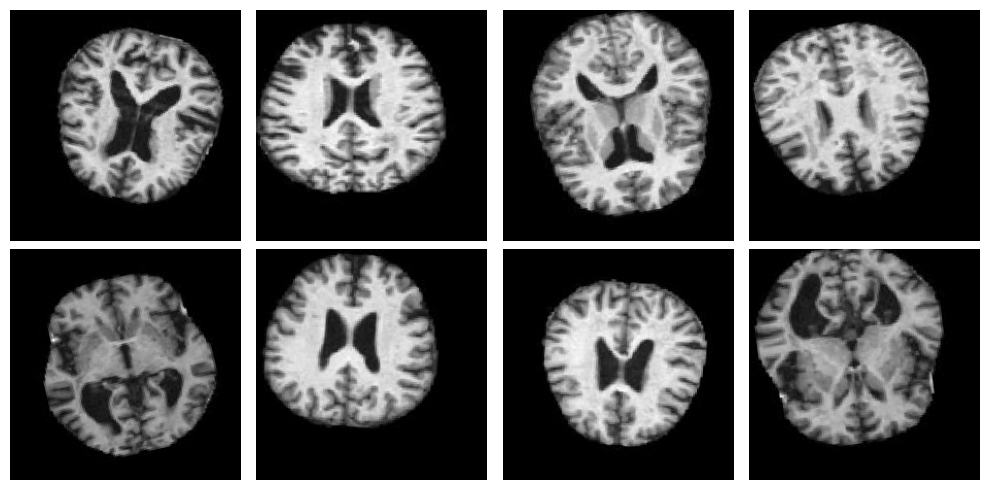

In [ ]:
# for the dataset augmentation
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

# 2️⃣ Dataset Path (Change to your dataset folder in Colab)
# Example: If images are in /content/medical_dataset
dataset_path = "/content/drive/MyDrive/Dataset"

# 3️⃣ Create an ImageDataGenerator with Augmentation
datagen = ImageDataGenerator(
    rescale=1.0/255,           # Normalize pixel values
    rotation_range=20,         # Random rotation (degrees)
    width_shift_range=0.1,     # Horizontal shift
    height_shift_range=0.1,    # Vertical shift
    zoom_range=0.1,            # Random zoom
    horizontal_flip=True,      # Flip horizontally
    vertical_flip=True,        # Flip vertically
    fill_mode='nearest'        # Fill empty pixels
)

# 4️⃣ Load images from folder
generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Resize images
    batch_size=8,
    class_mode='categorical'
)

# 5️⃣ Show 8 Augmented Images
images, labels = next(generator)  # Get a batch
plt.figure(figsize=(10, 5))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


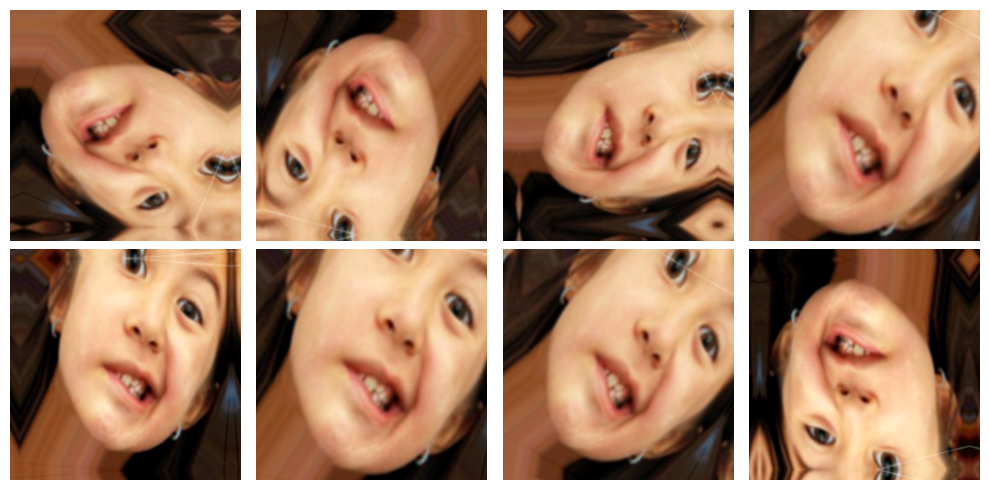

In [ ]:
# for a single medical image augmentation
# 1️⃣ Install & Import
!pip install tensorflow opencv-python matplotlib --quiet

import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# 2️⃣ Load a single medical image (change path to your image)
image_path = "/content/Image.png"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
img = cv2.resize(img, (224, 224))           # Resize

# Convert to Tensor
img_tensor = tf.convert_to_tensor(img, dtype=tf.float32)
img_tensor = tf.expand_dims(img_tensor, 0)  # Shape (1, H, W, C)

# 3️⃣ Define Augmentation Layers
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomContrast(0.2),
])

# 4️⃣ Apply Augmentation Multiple Times
plt.figure(figsize=(10, 5))
for i in range(8):
    augmented = data_augmentation(img_tensor) / 255.0  # Normalize for display
    plt.subplot(2, 4, i+1)
    plt.imshow(tf.squeeze(augmented))
    plt.axis('off')
plt.tight_layout()
plt.show()
